<a href="https://colab.research.google.com/github/Maheshwari241/PAT4_ML/blob/main/23MCA0386_PAT4_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Maheshwari Mururgavel
23MCA0386

In [ ]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.metrics import adjusted_rand_score

In [ ]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
true_labels = iris.target  # True labels from the dataset

In [ ]:
def euclidean_distance(x1, x2):
# Calculate the Euclidean distance between two data points
  distance = np.sqrt(np.sum((x1 - x2) ** 2))
  return distance

In [ ]:
def kmeans(X, k, max_iterations=100):
    # X: The data matrix (samples x features).
    # k: The number of clusters.
    # Initialize centroids randomly
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]
    # Iterate for maximum number of iterations
    for _ in range(max_iterations):
        # Assign data points to closest centroids
        labels = np.argmin([[euclidean_distance(x, c) for c in centroids] for x in X], axis=1)
        # Recalculate centroids
        new_centroids = np.array([np.mean(X[labels == i], axis=0) for i in range(k)])
        # Check for convergence (stopping criteria)
        if np.all(np.abs(centroids - new_centroids) < 1e-6):
            break
        centroids = new_centroids
    return centroids, labels

In [ ]:
# Perform K-Means clustering with k=3 (since there are three species of iris in the dataset)
k = 3
centroids, labels = kmeans(X, k)

In [ ]:
# Calculate ARI
ari = adjusted_rand_score(true_labels, labels)
print("Adjusted Rand Index (ARI):", ari)

Adjusted Rand Index (ARI): 0.7163421126838476


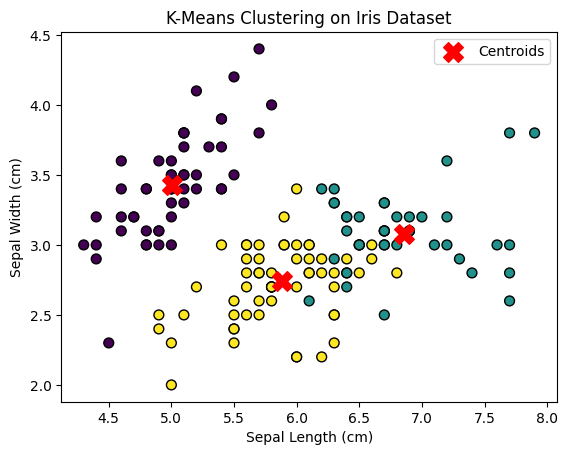

In [ ]:
# Visualization the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolors='k', s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-Means Clustering on Iris Dataset')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.show()